In [1]:
import warnings
import os
import gtfs_kit as gk
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm

In [2]:
import plot_style

In [2]:
import requests

url = "https://api.cts-strasbourg.eu/v1/siri/2.0/stoppoints-discovery"
token = "9b89d73f-dec7-4905-9888-77710f07790a"

response = requests.get(
    url,
    auth=(token, "")
)

print(response.status_code)
print(response.text)


200
{
  "StopPointsDelivery": {
    "ResponseTimestamp": "2026-01-24T16:10:26+01:00",
    "RequestMessageRef": null,
    "AnnotatedStopPointRef": [
      {
        "StopPointRef": "CIMEI_03",
        "Location": {
          "Longitude": 7.7566415505,
          "Latitude": 48.5478580334
        },
        "StopName": "Cité Meinau",
        "Extension": {
          "StopCode": "100C",
          "LogicalStopCode": "100",
          "IsFlexhopStop": false
        }
      },
      {
        "StopPointRef": "CIMEI_04",
        "Location": {
          "Longitude": 7.7568713459,
          "Latitude": 48.5477834515
        },
        "StopName": "Cité Meinau",
        "Extension": {
          "StopCode": "100D",
          "LogicalStopCode": "100",
          "IsFlexhopStop": false
        }
      },
      {
        "StopPointRef": "BOROM_02",
        "Location": {
          "Longitude": 7.681349131,
          "Latitude": 48.58743532
        },
        "StopName": "Bois Romain",
        "Extension

In [5]:
print(len(response.text))

439657


In [6]:
print(response.text[0])

{


In [4]:
print(stops.head())  # Display the first few rows of the stops DataFrame

                          stop_id stop_code            stop_name stop_desc  \
0  IDFM:monomodalStopPlace:473875      <NA>               Nation      <NA>   
1   IDFM:monomodalStopPlace:53783      <NA>     Chatou - Croissy      <NA>   
2   IDFM:monomodalStopPlace:53784      <NA>  Le Vésinet - Centre      <NA>   
3  IDFM:monomodalStopPlace:473890      <NA>    Denfert-Rochereau      <NA>   
4  IDFM:monomodalStopPlace:473843      <NA>   Cité Universitaire      <NA>   

   stop_lon   stop_lat zone_id stop_url  location_type parent_station  \
0  2.395944  48.848233       1     <NA>              0     IDFM:71673   
1  2.155938  48.885197       4     <NA>              0     IDFM:64483   
2  2.134334  48.890138       4     <NA>              0     IDFM:64514   
3  2.333221  48.833186       1     <NA>              0     IDFM:71056   
4  2.338858  48.821506       1     <NA>              0     IDFM:70623   

  stop_timezone  level_id  wheelchair_boarding  platform_code  
0          <NA>      <NA>   

In [5]:
selected_zone_ids = ["1", "2", "3", "4"]
selected_zone_ids = ["1", "2", "3"]

if 'zone_id' in stops.columns:
    filtered_stops = stops[stops['zone_id'].isin(selected_zone_ids)]
    color_map = {zone: plt.cm.jet(i / len(selected_zone_ids)) for i, zone in enumerate(selected_zone_ids)}
    colors = filtered_stops['zone_id'].map(color_map)
else:
    filtered_stops = stops
    colors = "black"  # Default color if zone_id is not available

In [6]:
long = filtered_stops['stop_lon']
lat = filtered_stops['stop_lat']

xmin, xmax, ymin, ymax = 2.14, 2.54, 48.725, 48.98
dx_min, dx_max, dy_min, dy_max = 0., 0.0, 0.0, 0.00

markersize = 1.5

title = "Paris metros and bus stations"
hist_title = "Distance distribution between stations"

In [7]:
print(len(long))

10624


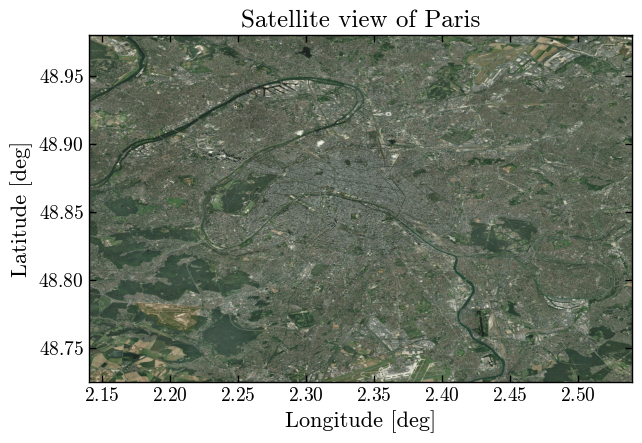

In [8]:
# plt.scatter(long, lat, color='k', s=markersize, marker='.')

paris_satellite_view = "export.png"
a = plt.imread(paris_satellite_view)
plt.imshow(a, extent=[xmin+dx_min, xmax+dx_max, ymin+dy_min, ymax+dy_max], alpha=0.9)  

plt.xlabel('Longitude [deg]')
plt.ylabel('Latitude [deg]')
plt.xlim(xmin, xmax)
plt.ylim(ymin, ymax)

plt.title("Satellite view of Paris")

plt.show()

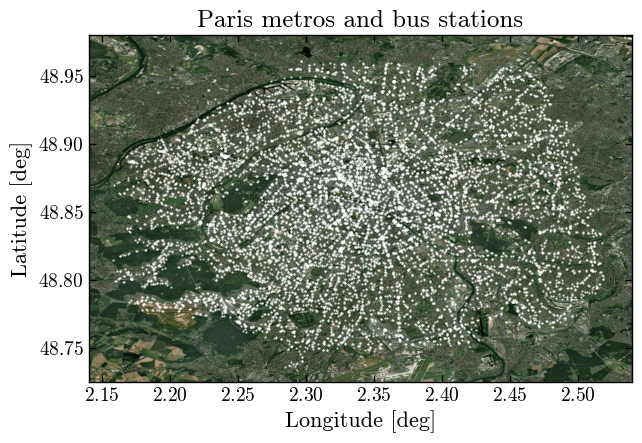

In [9]:
plt.scatter(long, lat, color='white', s=markersize, marker='.', alpha=0.7)

paris_satellite_view = "export.png"
a = plt.imread(paris_satellite_view)
plt.imshow(a, extent=[xmin+dx_min, xmax+dx_max, ymin+dy_min, ymax+dy_max], alpha=1)  

plt.xlabel('Longitude [deg]')
plt.ylabel('Latitude [deg]')
plt.xlim(xmin, xmax)
plt.ylim(ymin, ymax)

plt.title(title)

plt.show()

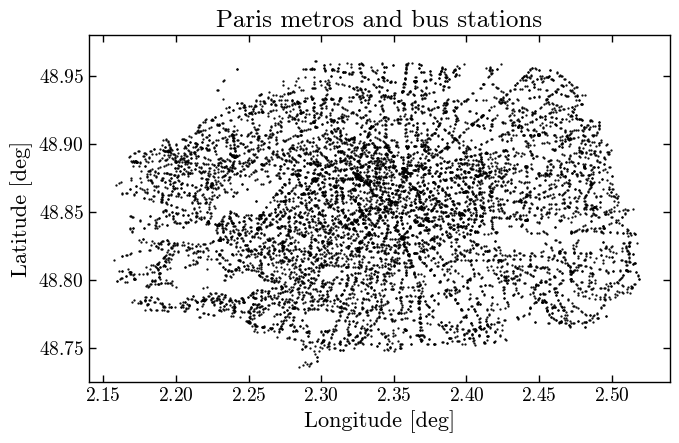

In [10]:
plt.scatter(long, lat, color='k', s=markersize, marker='.')

# plt.scatter([], [], color='k', s=50, marker='.', label="Stations")
# plt.legend(loc='upper left')

plt.xlabel('Longitude [deg]')
plt.ylabel('Latitude [deg]')
plt.xlim(xmin, xmax)
plt.ylim(ymin, ymax)

plt.title(title)
plt.show()

# Computing correlation function

#### Example of 1 point correlating

In [11]:
# Calculate dx and dy in kilometers relative to the center
from math import radians, cos

def degrees_to_km(degrees, latitude):
    R = 6371  # Earth radius in kilometers
    return degrees * (R * radians(1)) * cos(radians(latitude))

center_long = (xmin + xmax) / 2
center_lat = (ymin + ymax) / 2

filtered_stops['dx_km'] = filtered_stops['stop_lon'].apply(lambda lon: degrees_to_km(lon - center_long, center_lat))
filtered_stops['dy_km'] = filtered_stops['stop_lat'].apply(lambda lat: degrees_to_km(lat - center_lat, center_lat))

dx_km = filtered_stops['dx_km']
dy_km = filtered_stops['dy_km']

/var/folders/f5/js1cjmbn6fj4nwc48pf1xsrr0009yn/T/ipykernel_45506/3084041008.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_stops['dx_km'] = filtered_stops['stop_lon'].apply(lambda lon: degrees_to_km(lon - center_long, center_lat))
/var/folders/f5/js1cjmbn6fj4nwc48pf1xsrr0009yn/T/ipykernel_45506/3084041008.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_stops['dy_km'] = filtered_stops['stop_lat'].apply(lambda lat: degrees_to_km(lat - center_lat, center_lat))


In [12]:
dx_km

0         4.093246
3        -0.496021
4        -0.083579
5        12.583922
7        12.477626
           ...    
35998    -1.121671
36003     1.419090
36004     1.440055
36005     1.999065
36006    10.182944
Name: dx_km, Length: 10624, dtype: float64

In [13]:
dx_km[0]

np.float64(4.093245830980592)

In [14]:
dx_km.iloc[1]

np.float64(-0.4960206298846703)

<>:5: SyntaxWarning: invalid escape sequence '\D'
<>:6: SyntaxWarning: invalid escape sequence '\D'
<>:5: SyntaxWarning: invalid escape sequence '\D'
<>:6: SyntaxWarning: invalid escape sequence '\D'
/var/folders/f5/js1cjmbn6fj4nwc48pf1xsrr0009yn/T/ipykernel_45506/632487691.py:5: SyntaxWarning: invalid escape sequence '\D'
  plt.xlabel('$\Delta x$ [km]')
/var/folders/f5/js1cjmbn6fj4nwc48pf1xsrr0009yn/T/ipykernel_45506/632487691.py:6: SyntaxWarning: invalid escape sequence '\D'
  plt.ylabel('$\Delta y$ [km]')


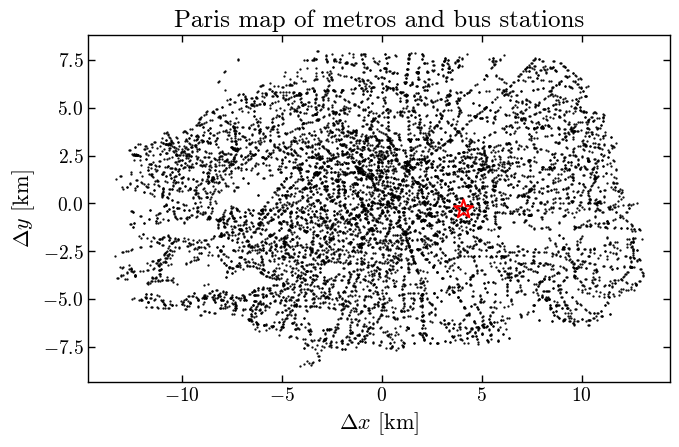

In [15]:
plt.scatter(dx_km, dy_km, color='k', s=markersize, marker='.')

plt.scatter(dx_km.iloc[0], dy_km.iloc[0], facecolors='none', edgecolors='red', s=200, marker='*',  linewidths=1.5)

plt.xlabel('$\Delta x$ [km]')
plt.ylabel('$\Delta y$ [km]')
plt.title("Paris map of metros and bus stations")
plt.show()

<>:14: SyntaxWarning: invalid escape sequence '\D'
<>:15: SyntaxWarning: invalid escape sequence '\D'
<>:14: SyntaxWarning: invalid escape sequence '\D'
<>:15: SyntaxWarning: invalid escape sequence '\D'
/var/folders/f5/js1cjmbn6fj4nwc48pf1xsrr0009yn/T/ipykernel_45506/4151496956.py:14: SyntaxWarning: invalid escape sequence '\D'
  plt.xlabel('$\Delta x$ [km]')
/var/folders/f5/js1cjmbn6fj4nwc48pf1xsrr0009yn/T/ipykernel_45506/4151496956.py:15: SyntaxWarning: invalid escape sequence '\D'
  plt.ylabel('$\Delta y$ [km]')


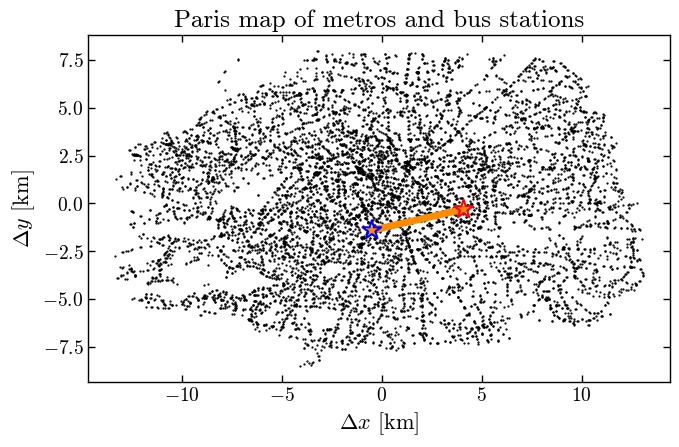

In [16]:
plt.scatter(dx_km, dy_km, color='k', s=markersize, marker='.', zorder=1)

plt.plot((dx_km.iloc[0], dx_km.iloc[1]), (dy_km.iloc[0], dy_km.iloc[1]), 
        color='darkorange', linewidth=5, zorder=2)

plt.scatter(dx_km.iloc[0], dy_km.iloc[0],
            facecolors='none', edgecolors='red', s=200,
            marker='*', linewidths=1.5, zorder=3)

plt.scatter(dx_km.iloc[1], dy_km.iloc[1],
            facecolors='none', edgecolors='blue', s=200,
            marker='*', linewidths=1.5, zorder=3)

plt.xlabel('$\Delta x$ [km]')
plt.ylabel('$\Delta y$ [km]')
plt.title("Paris map of metros and bus stations")
plt.show()

In [17]:
def calculate_distance(x1, y1, x2, y2):
    return np.sqrt((x2 - x1)**2 + (y2 - y1)**2)

distance = calculate_distance(dx_km.iloc[0], dy_km.iloc[0], dx_km.iloc[1], dy_km.iloc[1])

In [70]:
# bins = np.arange(0, 20.1, 0.5)

bins_long = np.arange(0, 10.1, 0.5)
print(bins_long)

[ 0.   0.5  1.   1.5  2.   2.5  3.   3.5  4.   4.5  5.   5.5  6.   6.5
  7.   7.5  8.   8.5  9.   9.5 10. ]


In [71]:
bins = np.linspace(0., 2., 41)
print(bins)

[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.   1.05 1.1  1.15 1.2  1.25 1.3  1.35
 1.4  1.45 1.5  1.55 1.6  1.65 1.7  1.75 1.8  1.85 1.9  1.95 2.  ]


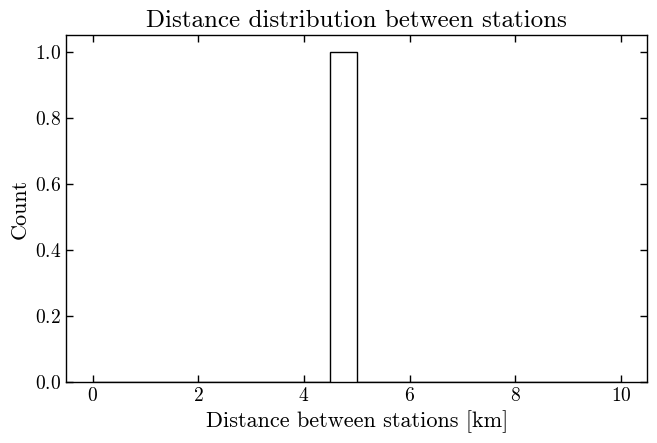

In [72]:
plt.hist([distance], bins=bins_long, color='skyblue', edgecolor='black', histtype='step')

plt.xlabel('Distance between stations [km]')
plt.ylabel('Count')
plt.title(hist_title)
plt.show()

In [73]:
pt2 = 3

<>:14: SyntaxWarning: invalid escape sequence '\D'
<>:15: SyntaxWarning: invalid escape sequence '\D'
<>:14: SyntaxWarning: invalid escape sequence '\D'
<>:15: SyntaxWarning: invalid escape sequence '\D'
/var/folders/f5/js1cjmbn6fj4nwc48pf1xsrr0009yn/T/ipykernel_45506/1056783270.py:14: SyntaxWarning: invalid escape sequence '\D'
  plt.xlabel('$\Delta x$ [km]')
/var/folders/f5/js1cjmbn6fj4nwc48pf1xsrr0009yn/T/ipykernel_45506/1056783270.py:15: SyntaxWarning: invalid escape sequence '\D'
  plt.ylabel('$\Delta y$ [km]')


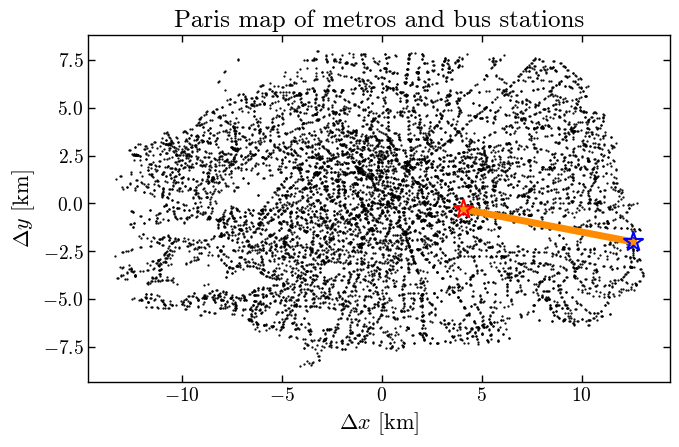

In [74]:
plt.scatter(dx_km, dy_km, color='k', s=markersize, marker='.', zorder=1)

plt.plot((dx_km.iloc[0], dx_km.iloc[pt2]), (dy_km.iloc[0], dy_km.iloc[pt2]), 
        color='darkorange', linewidth=5, zorder=2)

plt.scatter(dx_km.iloc[0], dy_km.iloc[0],
            facecolors='none', edgecolors='red', s=200,
            marker='*', linewidths=1.5, zorder=3)

plt.scatter(dx_km.iloc[pt2], dy_km.iloc[pt2],
            facecolors='none', edgecolors='blue', s=200,
            marker='*', linewidths=1.5, zorder=3)

plt.xlabel('$\Delta x$ [km]')
plt.ylabel('$\Delta y$ [km]')
plt.title("Paris map of metros and bus stations")
plt.show()

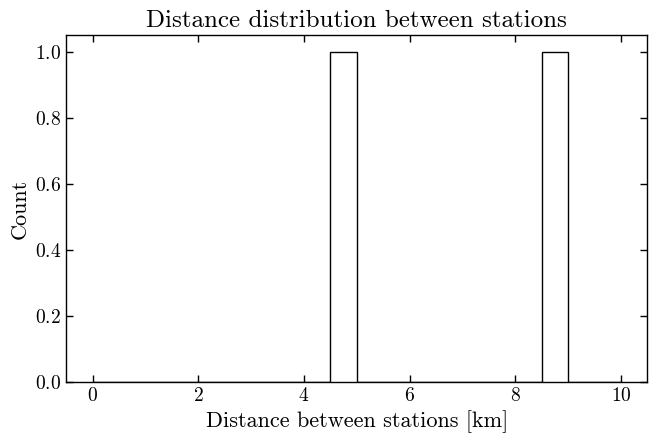

In [75]:
distance2 = calculate_distance(dx_km.iloc[0], dy_km.iloc[0], dx_km.iloc[pt2], dy_km.iloc[pt2])

plt.hist([distance, distance2], bins=bins_long, color='skyblue', edgecolor='black', histtype='step')

plt.xlabel('Distance between stations [km]')
plt.ylabel('Count')
plt.title(hist_title)
plt.show()

<>:16: SyntaxWarning: invalid escape sequence '\D'
<>:17: SyntaxWarning: invalid escape sequence '\D'
<>:16: SyntaxWarning: invalid escape sequence '\D'
<>:17: SyntaxWarning: invalid escape sequence '\D'
/var/folders/f5/js1cjmbn6fj4nwc48pf1xsrr0009yn/T/ipykernel_45506/1441218491.py:16: SyntaxWarning: invalid escape sequence '\D'
  plt.xlabel('$\Delta x$ [km]')
/var/folders/f5/js1cjmbn6fj4nwc48pf1xsrr0009yn/T/ipykernel_45506/1441218491.py:17: SyntaxWarning: invalid escape sequence '\D'
  plt.ylabel('$\Delta y$ [km]')


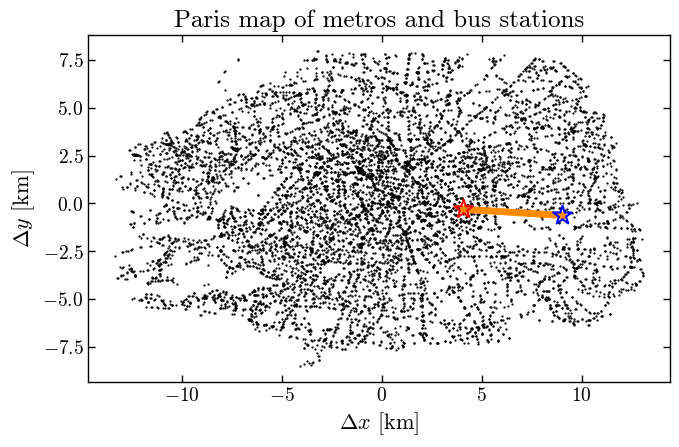

4.719468082098837 8.661127353805874 4.956230214022746


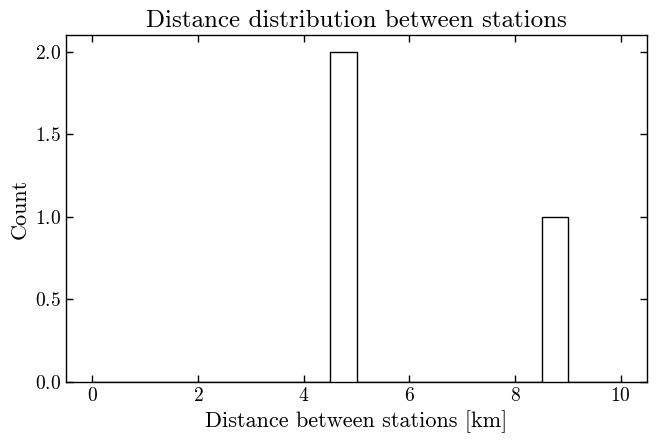

In [76]:
pt3 = 12

plt.scatter(dx_km, dy_km, color='k', s=markersize, marker='.', zorder=1)

plt.plot((dx_km.iloc[0], dx_km.iloc[pt3]), (dy_km.iloc[0], dy_km.iloc[pt3]), 
        color='darkorange', linewidth=5, zorder=2)

plt.scatter(dx_km.iloc[0], dy_km.iloc[0],
            facecolors='none', edgecolors='red', s=200,
            marker='*', linewidths=1.5, zorder=3)

plt.scatter(dx_km.iloc[pt3], dy_km.iloc[pt3],
            facecolors='none', edgecolors='blue', s=200,
            marker='*', linewidths=1.5, zorder=3)

plt.xlabel('$\Delta x$ [km]')
plt.ylabel('$\Delta y$ [km]')
plt.title("Paris map of metros and bus stations")
plt.show()


distance3 = calculate_distance(dx_km.iloc[0], dy_km.iloc[0], dx_km.iloc[pt3], dy_km.iloc[pt3])

print(distance, distance2, distance3)
plt.hist([distance, distance2, distance3], bins=bins_long, color='skyblue', edgecolor='black', histtype='step')

plt.xlabel('Distance between stations [km]')
plt.ylabel('Count')
plt.title(hist_title)
plt.show()

In [77]:
from tqdm import tqdm

In [78]:
edges = bins
# positions.shape = (N, 2)
# positions[:, 0] is x, positions[:, 1] is y
# Count pairs of points within a distance range
def pair_count_2d(positions, edges):
    counts = np.zeros(len(edges))
    for i in tqdm(range(positions.shape[0])):
        for j in range(i + 1, positions.shape[0]):
            dx = positions[i, 0] - positions[j, 0]
            dy = positions[i, 1] - positions[j, 1]
            dist2 = dx * dx + dy * dy
            # Only count if within the maximum distance
            if dist2 < edges[-1]**2:
                # Find the index in the edges array
                idx = int((np.sqrt(dist2) - edges[0])\
                        / (edges[-1] - edges[0])\
                        * len(counts))
                counts[idx] += 1
    return counts

In [79]:
positions = np.column_stack((dx_km.values, dy_km.values))
counts = pair_count_2d(positions, edges)

100%|██████████| 10624/10624 [00:29<00:00, 363.22it/s] 


In [80]:
counts

array([  6938.,   7752.,   7550.,  10585.,  14365.,  17371.,  20658.,
        23596.,  25908.,  28831.,  31811.,  34437.,  36939.,  39661.,
        42082.,  45829.,  48600.,  51169.,  53782.,  56855.,  59619.,
        61848.,  64666.,  66964.,  69668.,  72811.,  74862.,  77249.,
        79471.,  82268.,  85506.,  88963.,  90395.,  91722.,  94839.,
        97746., 100267., 101547., 104548., 107137., 109385.])

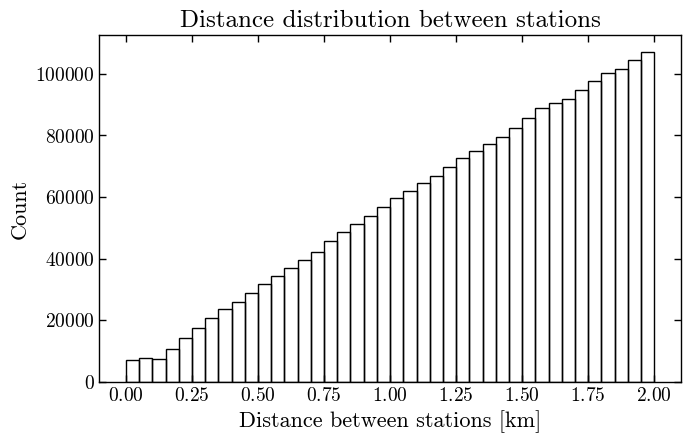

In [81]:
# Ensure counts matches bins[:-1]
counts2 = counts[:len(bins) - 1]

# Plot the histogram using the binned counts
plt.bar(bins[:-1], counts2, width=np.diff(bins), align='edge', facecolor='none', edgecolor='black')

# plt.plot(bins, counts)

plt.xlabel('Distance between stations [km]')
plt.ylabel('Count')
plt.title(hist_title)
plt.show()

# Generating random dots

In [82]:
# Generate random points within the map bounds
num_points = 5 * len(dx_km) #50000
print(num_points)
rng = np.random.RandomState(seed=42)

random_dx = np.random.uniform(np.min(dx_km), np.max(dx_km), num_points)
random_dy = np.random.uniform(np.min(dy_km), np.max(dy_km), num_points)

53120


<>:10: SyntaxWarning: invalid escape sequence '\D'
<>:11: SyntaxWarning: invalid escape sequence '\D'
<>:10: SyntaxWarning: invalid escape sequence '\D'
<>:11: SyntaxWarning: invalid escape sequence '\D'
/var/folders/f5/js1cjmbn6fj4nwc48pf1xsrr0009yn/T/ipykernel_45506/2339986465.py:10: SyntaxWarning: invalid escape sequence '\D'
  plt.xlabel('$\Delta x$ [km]')
/var/folders/f5/js1cjmbn6fj4nwc48pf1xsrr0009yn/T/ipykernel_45506/2339986465.py:11: SyntaxWarning: invalid escape sequence '\D'
  plt.ylabel('$\Delta y$ [km]')


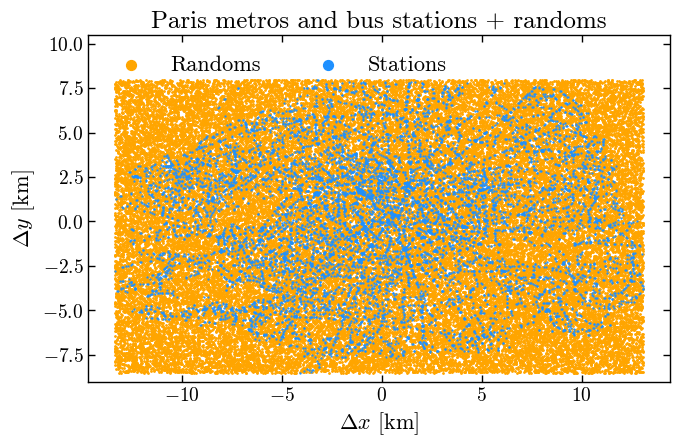

In [83]:
plt.scatter(random_dx, random_dy, color="orange", s=1, marker='o')
plt.scatter(dx_km, dy_km, color='dodgerblue', s=markersize, marker='.')

plt.ylim(np.min(dy_km)-0.5, np.max(dy_km)+2.5)

plt.scatter([], [], s=50, marker='o', color="orange", label="Randoms")
plt.scatter([], [], s=50,  marker='o', color='dodgerblue', label="Stations")
plt.legend(loc='upper left', ncol=2)

plt.xlabel('$\Delta x$ [km]')
plt.ylabel('$\Delta y$ [km]')
plt.title(title + " + randoms")
plt.show()

In [84]:
import numpy as np

In [85]:
if os.path.exists("counts_rand.csv"):
    counts_rand = np.loadtxt("counts_rand.csv", delimiter=",")
    print("Loaded counts_rand from file")
else:
    positions_rand = np.column_stack((random_dx, random_dy))
    counts_rand = pair_count_2d(positions_rand, edges)
    np.savetxt("counts_rand.csv", counts_rand, delimiter=",")
    print("Computed and saved counts_rand")

Loaded counts_rand from file


In [86]:
print(len(edges))

41


In [87]:
# np.savetxt("counts_rand.csv", counts_rand, delimiter=",")

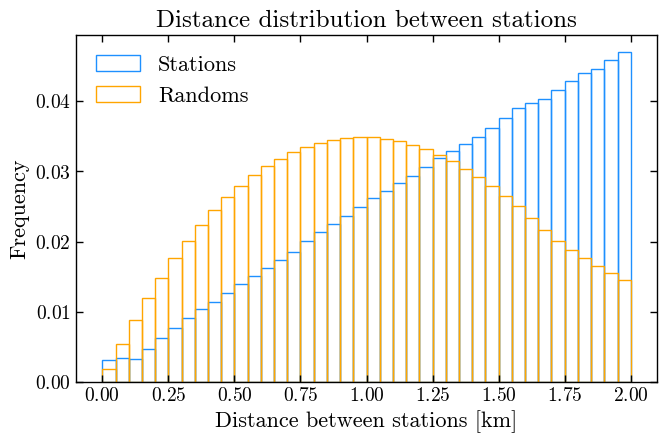

In [88]:
counts_rand2 = counts_rand[:len(bins) - 1]

counts_norm = counts2 / np.sum(counts2)
counts_rand_norm = counts_rand[:len(bins) - 1] / np.sum(counts_rand[:len(bins) - 1])

plt.bar(bins[:-1], counts_norm, width=np.diff(bins),
        align='edge', facecolor='none', edgecolor='dodgerblue',
        label = "Stations")

plt.bar(bins[:-1], counts_rand_norm, width=np.diff(bins),
        align='edge', facecolor='none', edgecolor='orange',
        label="Randoms")

plt.xlabel('Distance between stations [km]')
plt.ylabel('Frequency')
plt.title(hist_title)
plt.legend()
plt.show()

In [89]:
# Create 2D data histogram for station positions
hist, xedges, yedges = np.histogram2d(dx_km, dy_km, bins=20)
hist = hist / hist.max()  # Normalize to make it a probability

# Generate uniformly distributed randoms within the bounding box
nrandoms = len(dx_km) * 20
randoms_positions = np.column_stack([
    np.random.uniform(dx_km.min(), dx_km.max(), size=nrandoms),
    np.random.uniform(dy_km.min(), dy_km.max(), size=nrandoms)
])

# Bin randoms in the 2D space
xidx = np.digitize(randoms_positions[:, 0], bins=xedges) - 1
yidx = np.digitize(randoms_positions[:, 1], bins=yedges) - 1

# Downsample randoms to match the amplitude of the 2D data histogram
prob = np.random.uniform(0., 1., nrandoms)
mask = (xidx >= 0) & (xidx < hist.shape[0]) & (yidx >= 0) & (yidx < hist.shape[1]) & (prob < hist[xidx, yidx])
randoms_positions = randoms_positions[mask]

In [90]:
random_foot_dx, random_foot_dy = randoms_positions[:, 0], randoms_positions[:, 1]

<>:10: SyntaxWarning: invalid escape sequence '\D'
<>:11: SyntaxWarning: invalid escape sequence '\D'
<>:10: SyntaxWarning: invalid escape sequence '\D'
<>:11: SyntaxWarning: invalid escape sequence '\D'
/var/folders/f5/js1cjmbn6fj4nwc48pf1xsrr0009yn/T/ipykernel_45506/3555099311.py:10: SyntaxWarning: invalid escape sequence '\D'
  plt.xlabel('$\Delta x$ [km]')
/var/folders/f5/js1cjmbn6fj4nwc48pf1xsrr0009yn/T/ipykernel_45506/3555099311.py:11: SyntaxWarning: invalid escape sequence '\D'
  plt.ylabel('$\Delta y$ [km]')


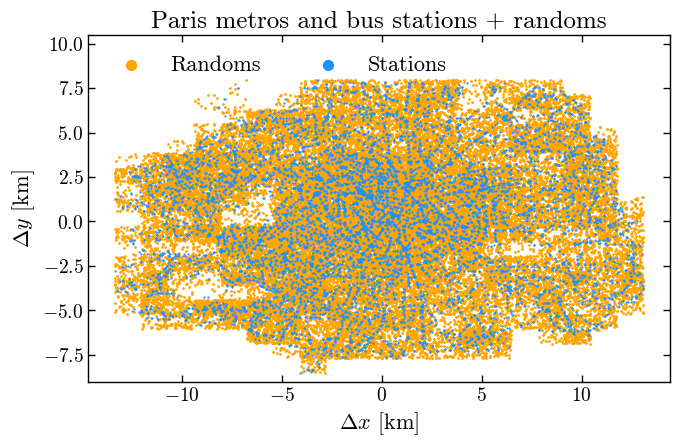

In [91]:
plt.scatter(random_foot_dx, random_foot_dy, color="orange", s=1, marker='o')
plt.scatter(dx_km, dy_km, color='dodgerblue', s=markersize, marker='.')

plt.ylim(np.min(dy_km)-0.5, np.max(dy_km)+2.5)

plt.scatter([], [], s=50, marker='o', color="orange", label="Randoms")
plt.scatter([], [], s=50,  marker='o', color='dodgerblue', label="Stations")
plt.legend(loc='upper left', ncol=2)

plt.xlabel('$\Delta x$ [km]')
plt.ylabel('$\Delta y$ [km]')
plt.title(title + " + randoms")
plt.show()

In [92]:
if os.path.exists("counts_rand_foot.csv"):
    counts_rand_foot = np.loadtxt("counts_rand_foot.csv", delimiter=",")
    print("Loaded counts_rand_foot from file")
else:
    positions_rand_foot = np.column_stack((random_foot_dx, random_foot_dy))
    counts_rand_foot = pair_count_2d(positions_rand_foot, edges)
    np.savetxt("counts_rand_foot.csv", counts_rand_foot, delimiter=",")
    print("Computed and saved counts_rand_foot")

Loaded counts_rand_foot from file


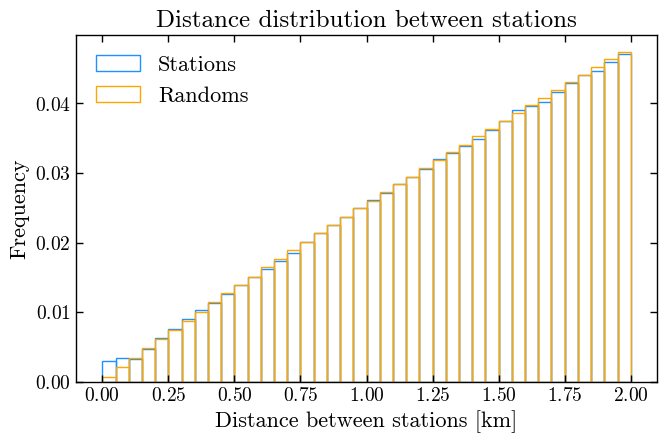

In [93]:
counts_rand_foot2 = counts_rand_foot[:len(bins) - 1]

counts_norm = counts2 / np.sum(counts2)
counts_rand_foot_norm = counts_rand_foot[:len(bins) - 1] / np.sum(counts_rand_foot[:len(bins) - 1])

plt.bar(bins[:-1], counts_norm, width=np.diff(bins),
        align='edge', facecolor='none', edgecolor='dodgerblue',
        label = "Stations")

plt.bar(bins[:-1], counts_rand_foot_norm, width=np.diff(bins),
        align='edge', facecolor='none', edgecolor='orange',
        label="Randoms")

# plt.plot(bins[:-1], counts_norm)

plt.xlabel('Distance between stations [km]')
plt.ylabel('Frequency')
plt.title(hist_title)
plt.legend()
plt.show()

In [94]:
corr_res = counts_norm / counts_rand_foot_norm - 1

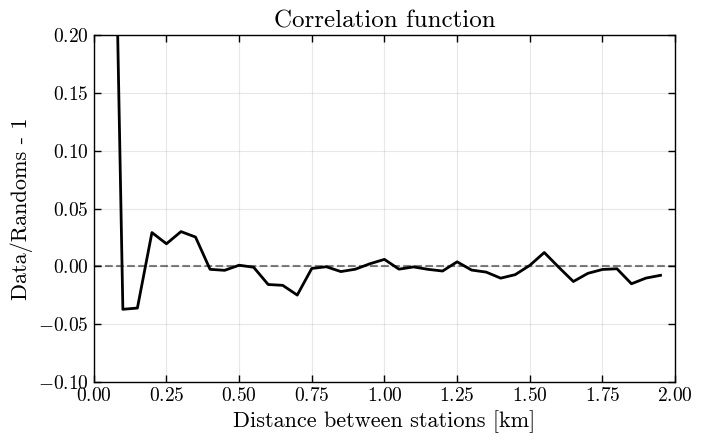

In [95]:
plt.axline((bins[0], 0), (bins[-1], 0), color='k', linestyle='--', alpha=0.5)

plt.plot(bins[:-1], corr_res, color='k', lw=2)

plt.xlim(0,2)
plt.ylim(-0.1,0.2)

plt.xlabel('Distance between stations [km]')
plt.ylabel('Data/Randoms - 1')
plt.title("Correlation function")
# plt.legend()
plt.grid(alpha=0.3)
plt.show()